In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10 # 10 tane sınıf olduğunda n cifar10 deniyormuş

(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train,x_test = x_train/255.0 , x_test/255.0
y_train,t_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:",x_train.shape)
print("y_train.shape:",y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [4]:
# Number of classes
K = len(set(y_train)) # eşsiz değerleri almak için set yazdık
print("number of classes:",K)

number of classes: 10


In [5]:
# Build the model using the funcional API
i = Input(shape=x_train[0].shape)

#X = Conv2D(32,(3,3),strides=2,activation='relu')(i)
#X = Conv2D(64,(3,3),strides=2,activation='relu')(X)
#X = Conv2D(128,(3,3),strides=2,activation='relu')(X)
X = Conv2D(32,(3,3),activation='relu',padding='same')(i)
X = BatchNormalization()(X)
X = Conv2D(32,(3,3),activation='relu',padding='same')(X)
X = BatchNormalization()(X)
X = MaxPooling2D((2,2))(X)
#X = Dropout(0.2)(X)
X = Conv2D(64,(3,3),activation='relu',padding='same')(X)
X = BatchNormalization()(X)
X = Conv2D(64,(3,3),activation='relu',padding='same')(X)
X = BatchNormalization()(X)
X = MaxPooling2D((2,2))(X)
#X = Dropout(0.2)(X)
X = Conv2D(128,(3,3),activation='relu',padding='same')(X)
X = BatchNormalization()(X)
X = Conv2D(128,(3,3),activation='relu',padding='same')(X)
X = BatchNormalization()(X)
X = MaxPooling2D((2,2))(X)
#X = Dropout(0.2)(X)

# X = GlobalMaxPooling2D()(X)
X = Flatten()(X)
X = Dropout(0.5)(X)
X = Dense(1024,activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(K, activation='softmax')(X)

model = Model(i,X)

In [6]:
# Compile
# Note: make sure you're using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#Fit
r = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.4264 - loss: 1.8328 - val_accuracy: 0.5766 - val_loss: 1.2320
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.6602 - loss: 0.9701 - val_accuracy: 0.7027 - val_loss: 0.8678
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7216 - loss: 0.8042 - val_accuracy: 0.7115 - val_loss: 0.8456
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7604 - loss: 0.6972 - val_accuracy: 0.6369 - val_loss: 1.1412
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7888 - loss: 0.6097 - val_accuracy: 0.7654 - val_loss: 0.6933
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8163 - loss: 0.5359 - val_accuracy: 0.7828 - val_loss: 0.6651
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8340 - loss: 0.4820 - val_accuracy: 0.7987 - val_loss: 0.6002
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.8546 - loss: 

In [8]:
# Fit with data augmentation
#Note: if you run this AFTER calleng the previous model.fit(), will CONTINUE training where it left off
batch_size =32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator= data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch = x_train.shape[0]//batch_size
#r = model.fit_generator(train_generator,validation_data=(x_test,y_test),steps_per_epoch=steps_per_epoch,epochs=50)
# .fit_generator artık yok yerine sadece fit yazılıyormuş
r = model.fit(train_generator,validation_data=(x_test,y_test),steps_per_epoch=steps_per_epoch,epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.3971 - loss: 1.8996 - val_accuracy: 0.6035 - val_loss: 1.1171
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6250 - loss: 1.0249

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - accuracy: 0.6250 - loss: 1.0249 - val_accuracy: 0.5980 - val_loss: 1.1444
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.6098 - loss: 1.1198 - val_accuracy: 0.5972 - val_loss: 1.2212
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.6562 - loss: 1.0576 - val_accuracy: 0.6027 - val_loss: 1.2050
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.6728 - loss: 0.9420 - val_accuracy: 0.6432 - val_loss: 1.0250
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.6562 - loss: 1.0523 - val_accuracy: 0.6412 - val_loss: 1.0297
Epoch 7/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.7103 - loss: 0.8354 - val_accuracy: 0.7374 - val_loss: 0.7818
Epoch 8/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.7188 - loss: 0.8813 - val_accuracy: 0.7378 - val_loss: 0.7808
Epoch 9/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7405 - loss: 0.76

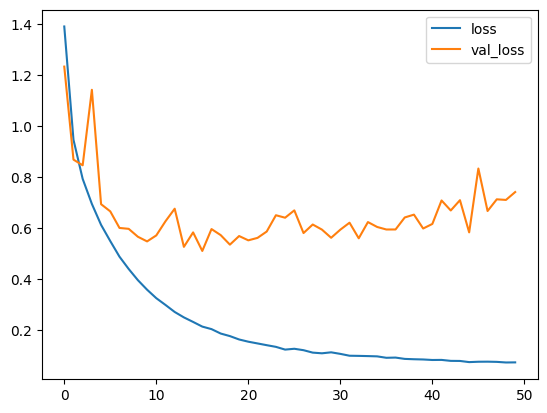

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
# ilk fit olan

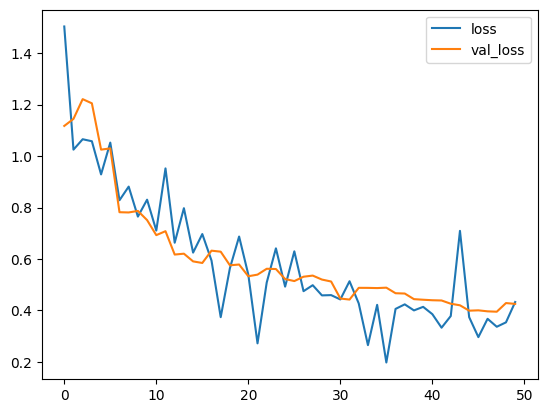

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
#data augmentation olan

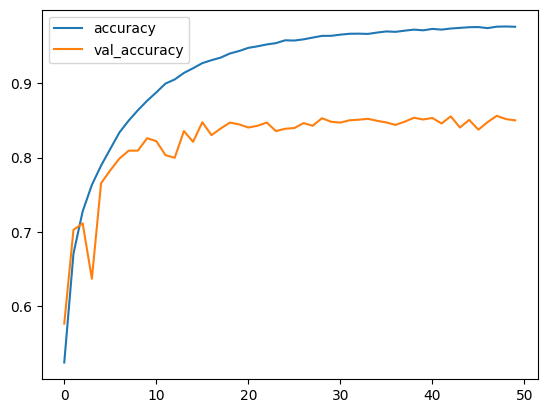

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
# ilk fit olan

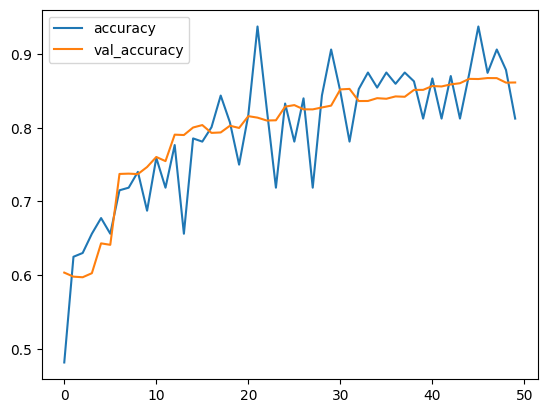

In [10]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
#data augmentation olan

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Confusion matrix, withoud normalization
[[875   7  45   5  12   4  10   7  22  13]
 [  6 920   4   1   2   1   5   2  11  48]
 [ 31   0 793  23  65  37  32  12   5   2]
 [ 11   2  76 622  62 127  55  25  11   9]
 [  2   3  37  12 894  11  24  15   2   0]
 [  3   0  34  78  36 804  12  30   1   2]
 [  4   1  33  15  23  10 899   5   9   1]
 [  8   0  19  11  51  23   3 881   0   4]
 [ 43   7   9   3   5   5   6   0 902  20]
 [ 19  42   6   2   2   1   6   5   7 910]]


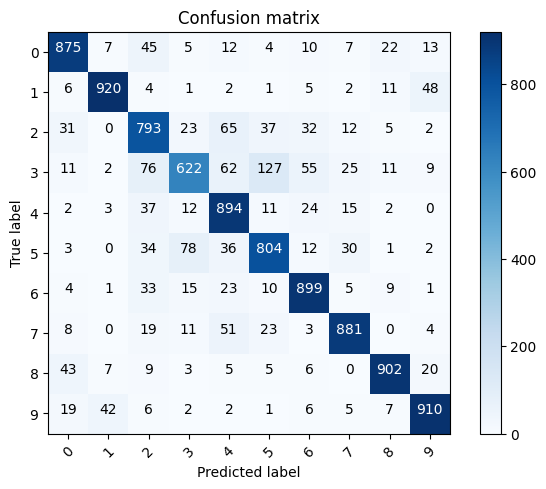

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  #This function prints and plots the confusion matrix.
  #Normalization can be applied by setting "normalize=True"

  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, withoud normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalize else 'd'
  thresh =cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j],fmt),
             horizontalalignment="center",
             color="white" if cm[i,j]>thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))
# ilk fit olan

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion matrix, withoud normalization
[[888   6  16   3   3   2   4   2  42  34]
 [ 10 902   0   0   1   0   1   0  11  75]
 [ 49   2 796  18  16  31  48  15   9  16]
 [ 17   5  33 679  21 126  47  30  14  28]
 [ 11   1  44  25 771  22  63  56   5   2]
 [  7   1  19  70  18 815  19  38   3  10]
 [  7   0  22  14   2   8 932   2   8   5]
 [  8   0   8   6   8  17   4 937   1  11]
 [ 25   6   3   1   0   1   1   0 937  26]
 [  9  18   2   0   0   2   1   0  10 958]]


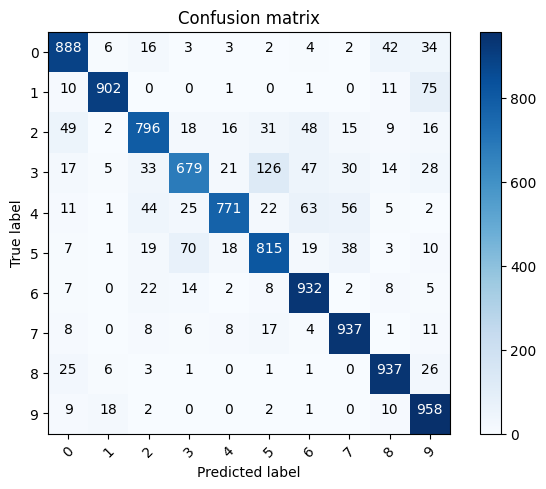

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  #This function prints and plots the confusion matrix.
  #Normalization can be applied by setting "normalize=True"

  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, withoud normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalize else 'd'
  thresh =cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j],fmt),
             horizontalalignment="center",
             color="white" if cm[i,j]>thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))
#data augmentation olan

In [ ]:
# Label mapping
labels = ''' airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

TypeError: only integer scalar arrays can be converted to a scalar index

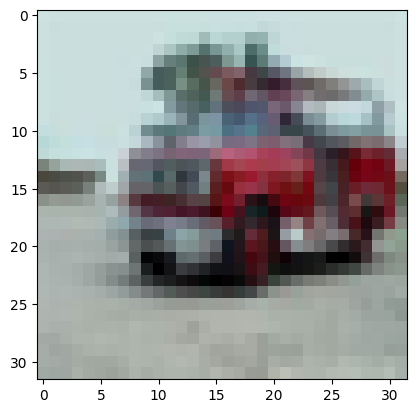

In [ ]:
#Show some misclassified examples
#TODO: add label names
## ilk fit olan

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predictied: %s " %(labels[y_test[i]],labels[p_test[i]]));

In [ ]:
# Now that the model is so large, it's useful to summarize it
model.summary()
#ilk fit için

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,189,888 (27.43 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 4,792,662 (18.28 MB)

In [12]:
# Now that the model is so large, it's useful to summarize it
model.summary()
#data augmentation olan

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,189,888 (27.43 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 4,792,662 (18.28 MB)

---

1. Modelin İnşası (Fonksiyonel API ile)

In [ ]:
i = Input(shape=x_train[0].shape)


Amaç: Modelin giriş boyutunu tanımlar. Girdi, x_train[0].shape ile belirtilmiştir (28x28x1).

Konvolüsyonel Katmanlar



In [ ]:
X = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
X = BatchNormalization()(X)
X = Conv2D(32, (3, 3), activation='relu', padding='same')(X)
X = BatchNormalization()(X)
X = MaxPooling2D((2, 2))(X)


Conv2D: 32 filtre, 3x3 boyutunda. Aktivasyon fonksiyonu olarak ReLU kullanılmıştır.

BatchNormalization: Her bir katmandaki çıktıyı normalize ederek modelin daha hızlı öğrenmesini ve stabil çalışmasını sağlar.

MaxPooling2D: 2x2 pencerede maksimum değerleri seçerek özellik haritasını özetler (boyutları küçültür).

Daha Derin Konvolüsyonel Katmanlar:

In [ ]:
X = Conv2D(64, (3, 3), activation='relu', padding='same')(X)
X = BatchNormalization()(X)
X = Conv2D(64, (3, 3), activation='relu', padding='same')(X)
X = BatchNormalization()(X)
X = MaxPooling2D((2, 2))(X)


Daha fazla filtre (64) eklenerek özelliklerin daha karmaşık ilişkilerini öğrenme sağlanır.

In [ ]:
X = Conv2D(128, (3, 3), activation='relu', padding='same')(X)
X = BatchNormalization()(X)
X = Conv2D(128, (3, 3), activation='relu', padding='same')(X)
X = BatchNormalization()(X)
X = MaxPooling2D((2, 2))(X)


Model derinleştirilerek daha büyük filtre boyutları (128) eklenmiştir.

Tam Bağlantılı (Fully Connected) Katmanlar

In [13]:
X = Flatten()(X)  # Konvolüsyonel katmanların çıktısını düzleştirir.
X = Dropout(0.5)(X)  # %50 Dropout uygulanarak aşırı öğrenme önlenir.
X = Dense(1024, activation='relu')(X)  # 1024 nöronlu tam bağlantılı katman.
X = Dropout(0.2)(X)  # %20 Dropout uygulanır.
X = Dense(K, activation='softmax')(X)  # K sınıfa göre olasılık tahminleri.


Flatten: Konvolüsyonel katmanların 2D çıktısını 1D vektöre dönüştürür.

Dense: Tam bağlantılı nöron katmanları ile sınıflandırma yapılır.

Dropout: Aşırı öğrenmeyi önlemek için kullanılır.


2. Veri Çoğaltma (Data Augmentation) ve Model Eğitimi

In [ ]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,  # Genişlikte rastgele kaydırma.
    height_shift_range=0.1,  # Yükseklikte rastgele kaydırma.
    horizontal_flip=True  # Rastgele yatay çevirme.
)
train_generator = data_generator.flow(x_train, y_train, batch_size=32)  # Veri jeneratörü oluşturulur.
steps_per_epoch = x_train.shape[0] // batch_size  # Her epoch'taki adım sayısı.

r = model.fit_generator(
    train_generator,
    validation_data=(x_test, y_test),
    steps_per_epoch=steps_per_epoch,
    epochs=50
)


Amaç: Modelin genelleme kabiliyetini artırmak için veriyi çeşitlendirir.

ImageDataGenerator: Gerçek zamanlı veri artırma işlemini gerçekleştirir.

fit_generator: Veri jeneratörü ile modeli eğitir.


3. Model Özeti

In [ ]:
model.summary()


Modelin katman yapısını, parametre sayılarını ve çıkış boyutlarını özetler.

Çıktılar:

Eğitim Sonuçları: Model doğruluk ve kayıpları ile birlikte grafiklenebilir.

Model Özeti: Modelin toplam parametre sayısı ve katman yapısı gösterilecektir.

Confusion Matrix ve Yanlış Sınıflamalar: Sınıf bazında başarıyı analiz etmek için uygundur.